In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import SVD
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'surprise'

In [14]:
df = pd.read_csv('https://query.data.world/s/tkvba25iumligdp5asmkyrkzrhjr3o')

In [5]:
#df.head(5)

In [15]:
df.rename(columns={'id':'Id','reviews.numHelpful':'Number of helphul reviews','manufacturer':'Manufacturer','name':'ItemName','prices':'Price','manufacturerNumber':'ManufacturID','asins':'ProductId','brand':'Brand','categories':'Categories','colors':'Color','reviews.date':'Date', 'Date':'rem','date_Updated':'re','dimension':'Size','keys':'Key','reviews.rating':'Rating','reviews.sourceURLs':'Review_URL','reviews.text':'Review','reviews.title':'Review_Title', 'reviews.userCity':'City','reviews.userProvince':'Province','reviews.username':'UserName','sizes':'remove','upc':'remove2','weight':'Weight'}, inplace=True)


In [16]:
df.columns

Index(['Id', 'ProductId', 'Brand', 'Categories', 'Color', 'dateAdded',
       'dateUpdated', 'Size', 'ean', 'Key', 'Manufacturer', 'ManufacturID',
       'ItemName', 'Price', 'Date', 'reviews.doRecommend',
       'Number of helphul reviews', 'Rating', 'Review_URL', 'Review',
       'Review_Title', 'City', 'Province', 'UserName', 'remove', 'remove2',
       'Weight'],
      dtype='object')

In [17]:
df.head(4)

,Id,ProductId,Brand,Categories,Color,dateAdded,dateUpdated,Size,ean,Key,...,Rating,Review_URL,Review,Review_Title,City,Province,UserName,remove,remove2,Weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams


In [18]:
df['Rating'] = df['Rating'].fillna(0).astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1597 non-null   object 
 1   ProductId                  1597 non-null   object 
 2   Brand                      1597 non-null   object 
 3   Categories                 1597 non-null   object 
 4   Color                      774 non-null    object 
 5   dateAdded                  1597 non-null   object 
 6   dateUpdated                1597 non-null   object 
 7   Size                       565 non-null    object 
 8   ean                        898 non-null    float64
 9   Key                        1597 non-null   object 
 10  Manufacturer               965 non-null    object 
 11  ManufacturID               902 non-null    object 
 12  ItemName                   1597 non-null   object 
 13  Price                      1597 non-null   objec

In [ ]:
df.drop(['ean','remove','remove2','Weight','color','dateAdded','dateUpdated',''], axis=1, inplace=True)

reviews_data.head()

In [20]:
def clean(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [29]:
df.head(5)

,Id,ProductId,Brand,Categories,Color,dateAdded,dateUpdated,Size,ean,Key,...,Rating,Review_URL,Review,Review_Title,City,Province,UserName,remove,remove2,Weight
798,AVpe7LD5LJeJML43ybWA,"B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B0...",Amazon,"Amazon Devices,Kindle Store,buy a kindle",NaN,2015-05-22T15:33:59Z,2017-07-18T23:52:40Z,NaN,NaN,"kindlefirehdx7/b00dopno4m,kindlefirehdx7/b00bw...",...,0,http://www.amazon.com/kindle-fire-hdx-student-...,I ordered the original Kindle keyboard 2nd gen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,AVpjWh8e1cnluZ0-Vy0O,B00LWHU9D8,Amazon,"Electronics,Amazon Devices",GB,2016-05-20T11:07:30Z,2017-07-25T17:42:39Z,NaN,NaN,firehd6tablet/b00lwhu9d8,...,0,http://www.amazon.com/Fire-HD-Display-Wi-Fi-GB...,"For the low price, this tablet really does mor...","HD Fire 6 is great for the price! 3,560 people...",NaN,NaN,Earthling1984,NaN,NaN,NaN
803,AVpe7LD5LJeJML43ybWA,"B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B0...",Amazon,"Amazon Devices,Kindle Store,buy a kindle",NaN,2015-05-22T15:33:59Z,2017-07-18T23:52:40Z,NaN,NaN,"kindlefirehdx7/b00dopno4m,kindlefirehdx7/b00bw...",...,0,http://www.amazon.com/kindle-fire-hdx-student-...,I am 67 and the only problem I have with my ki...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,AVpfLiCSilAPnD_xWpk_,B00CX5P8FC,Amazon,"Categories,Amazon Devices,Electronics Features...",NaN,2015-05-22T18:12:20Z,2017-08-08T22:03:26Z,NaN,8.487190e+11,"848719022827,0848719022827,amazonfiretv/b00cx5...",...,0,http://www.amazon.com/Fire-TV-streaming-media-...,I am not a casual user of on-demand content an...,This box is a GAME CHANGER for on demand conte...,NaN,NaN,William Hardin,NaN,8.487190e+11,NaN
374,AVpfLiCSilAPnD_xWpk_,B00CX5P8FC,Amazon,"Categories,Amazon Devices,Electronics Features...",NaN,2015-05-22T18:12:20Z,2017-08-08T22:03:26Z,NaN,8.487190e+11,"848719022827,0848719022827,amazonfiretv/b00cx5...",...,0,http://www.amazon.com/Fire-TV-streaming-media-...,"I collect these streaming boxes, anything from...",So much more than I expected!,NaN,NaN,Meddle,NaN,8.487190e+11,NaN


0    420
1     42
2     34
3    124
4    236
5    741
Name: Rating, dtype: int64


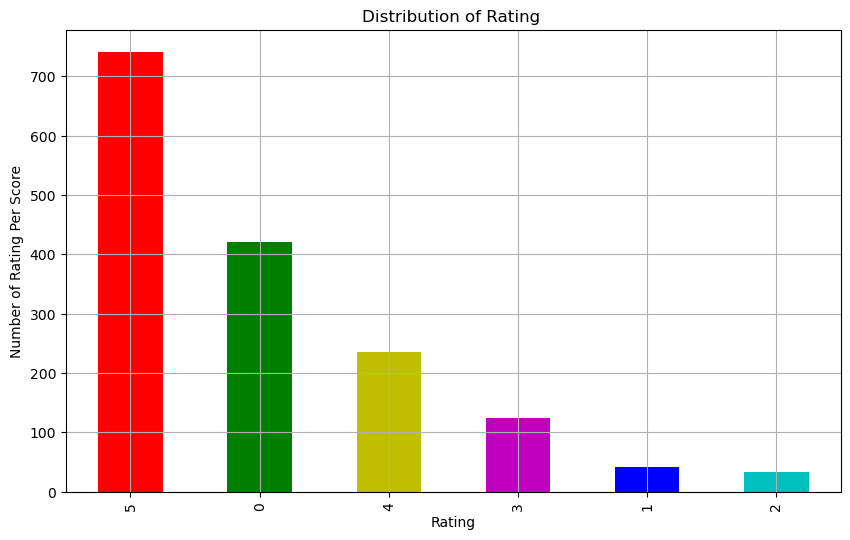

In [28]:
category_dist = df['Rating'].value_counts()


plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'y', 'm', 'b', 'c']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
df.sort_values(by = 'Rating', ascending=True, inplace=True)

plt.xlabel("Rating")
plt.ylabel("Number of Rating Per Score")
plt.title("Distribution of Rating ")
print(df['Rating'].value_counts().sort_index());
plt.show()

In [ ]:
def partition(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

act_score = df['Rating']
pos_neg = act_score.map(partition)
df['Rating'] = pos_neg

df

In [ ]:
category_dist = df['Rating'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews")
plt.show()